**классификатор текстов**

SnowballStemmer+TfidfVectorizer

_Евгений Борисов <esborisov@sevsu.ru>_

## тексты

In [1]:
import pandas as pd
pd.options.display.precision = 2 
pd.options.display.max_colwidth = 200 

from tqdm.notebook import tqdm
tqdm.pandas()

датасеты для примеров  https://disk.yandex.ru/d/3_WAa7SgrQYBzw

In [2]:
# загружаем тексты
data = pd.read_pickle('../data/news.pkl.gz')
print('записей:',len(data))
data.sample(2)

записей: 3196


,text,tag
2172,"Нападающий «Филадельфии»признан первой звездой игровой недели в регулярном чемпионате НХЛ.\n\nЧешский хоккеист набрал 9 (3+6) очков в четырех матчах, в которых «Флайерз» не потерпели ни одного пор...",sport
1852,"Россия хочет нормализации отношений с Японией, заявил президент России Владимир Путин в интервью японской телекомпании Nippon TV (NTV).\n\n""Начиная с 1956 года, когда были восстановлены дипломатич...",politics


## токенайзер со стемингом и очисткой

In [3]:
# !pip install natasha 

In [4]:
# import nltk
# nltk.download('stopwords')

In [5]:
# простой токенайзер

import re
from razdel import tokenize
from nltk.corpus import stopwords as nltk_stopwords
stopwords = set(nltk_stopwords.words('russian'))

def tokenizer(text,stopwords=stopwords):
    return [
            t.text for t in tokenize( # разбиваем текст на слова
                re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
            ) 
            if not (
               False
               or (t.text in stopwords) # выкидываем предлоги, союзы и т.п.    
               or re.match(r'^[^a-zA-ZЁёА-я]+$', t.text) # выкидываем токены не содержащие букв
               or re.match(r'^(\w)\1+$', t.text)  # выкидываем токены из одного повторяющегося символа
               or re.match(r'^[^a-zA-ZЁёА-я].*$', t.text)  # выкидываем токены начинающиеся не с буквы
            )
        ] 

In [6]:
# токенайзер cо стеммером
#
# from nltk.tokenize import word_tokenize as nltk_tokenize_word
# from nltk.stem.snowball import SnowballStemmer
# from nltk.corpus import stopwords as nltk_stopwords
# import re

# stemmer = SnowballStemmer('russian')
# stopwords = set(nltk_stopwords.words('russian'))

# def tokenizer(text,stemmer=stemmer,stopwords=stopwords):
#     return [
#             stemmer.stem(t) # выполняем стеминг
#             for t in nltk_tokenize_word( # разбиваем текст на слова
#                 re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
#                 language='russian'
#             ) 
#             if not (
#                (len(t)<3) # выкидываем очень короткие слова
#                or re.match(r'^[^a-zA-ZЁёА-я]+$', t) # выкидываем токены не содержащие букв
#                or re.match(r'^(\w)\1+$', t)  # выкидываем токены из одного повторяющегося символа
#                or re.match(r'^[^a-zA-ZЁёА-я].*$', t)  # выкидываем токены начинающиеся не с буквы
#                or (t in stopwords) # выкидываем предлоги, союзы и т.п.    
#             )
#         ] 
    
# # data['text'].progress_apply(tokenizer)

In [7]:
# # токенайзер с лемматизацией

# from natasha import Doc
# from natasha import Segmenter
# from natasha import MorphVocab
# from natasha import NewsEmbedding
# from natasha import NewsMorphTagger

# from nltk.corpus import stopwords as nltk_stopwords
# stopwords = set(nltk_stopwords.words('russian'))

# seg = Segmenter() # базовый токенизатор
# # морфологический анализ
# tagger = NewsMorphTagger( NewsEmbedding() )
# lvoc = MorphVocab() # лемматизатор

# def tokenizer(text,seg=seg, tagger=tagger, lvoc=lvoc, stopwords=stopwords):
#     doc = Doc(text)
#     doc.segment(seg)
#     doc.tag_morph(tagger)
#     for t in doc.tokens: t.lemmatize(lvoc)
        
#     return [
#         t.lemma for t in doc.tokens
#         if not (
#              False
#             or (t.lemma in stopwords) # выкидываем предлоги, союзы и т.п.  
#             or re.match(r'^[^a-zA-ZЁёА-я]+$', t.lemma) # выкидываем токены не содержащие букв
#             or re.match(r'^(\w)\1+$', t.lemma)  # выкидываем токены из одного повторяющегося символа
#             or re.match(r'^[^a-zA-ZЁёА-я].*$', t.lemma)  # выкидываем токены начинающиеся не с буквы
#         )
#     ]

## выполняем частотный анализ

In [8]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer

# использования токенайзера вместе с векторайзером
tf_model = TfidfVectorizer(
        min_df=.001, # выкидываем очень редкие слова
        max_df=.10, # выкидываем очень частые слова
        use_idf=False, # не используем обратную частоту
        norm='l2', # нормируем TF
        tokenizer=tokenizer, # ф-ция токенайзер
        token_pattern=None, # отключаем дефолтный токенайзер
    )

data_tf = tf_model.fit_transform( data['text'] )

CPU times: user 4.18 s, sys: 3.46 ms, total: 4.18 s
Wall time: 4.19 s


In [9]:
data_tf.shape

(3196, 19991)

In [10]:
vcb1 = sorted(tf_model.vocabulary_)
print(len(vcb1))
pd.Series(vcb1).sample(30)

19991


13964    профессионалом
8821         нарушениях
3507           грузовик
16911           статуса
19356             чехии
10232      опубликованы
9820            объемом
15445           сдается
2979        выступлении
317                 now
1374             блогер
4893            загреба
12137     положительные
10577     отечественном
14187             пятно
6072          испытание
19855             южных
3663           движения
17100            строке
11873           поездки
3946             джимми
13413         принялись
12260            помимо
7353             легион
16494          составом
19207              цену
2172           вложений
2495       востребованы
16923            стекла
5895        интересного
dtype: object

## формируем датасеты

In [11]:
labels = { t:i for i,t in enumerate(sorted(set(data['tag']))) }
labels

{'auto': 0,
 'culture': 1,
 'economics': 2,
 'health': 3,
 'incident': 4,
 'politics': 5,
 'realty': 6,
 'reclama': 7,
 'science': 8,
 'social': 9,
 'sport': 10,
 'tech': 11,
 'woman': 12}

In [12]:
y = data['tag'].map(labels).values
y

array([5, 1, 1, ..., 8, 5, 9])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data_tf, y, test_size=0.3, random_state=326 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2237, 19991), (2237,), (959, 19991), (959,))

## обучаем классификатор

In [14]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='hinge',max_iter=1000, tol=0.19).fit(X_train,y_train)

## тестируем

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [16]:
# доля правильных ответов на учебном наборе
o = clf.predict(X_train)
accuracy_score(y_train,o)

0.9991059454626732

In [17]:
# доля правильных ответов на тестовом наборе
o = clf.predict(X_test)

accuracy_score(y_test,o)

0.872784150156413

| точность (precision) | полнота (recall) | f1-score |
| :---: | :---: | :---: |
| $\frac{TP}{TP + FP}$ |  $\frac{TP}{TP + FN}$ |  $\frac{2 \cdot P \cdot R}{ P + R}$ |
| найдено позитивных / всего найдено |  найдено позитивных / всего позитивных | - |

In [18]:
print( classification_report( y_test, o, target_names=sorted(labels.keys()) ) )

              precision    recall  f1-score   support

        auto       0.96      0.87      0.92        87
     culture       0.80      0.89      0.84       101
   economics       0.81      0.84      0.83        76
      health       0.74      0.65      0.69        31
    incident       0.90      0.94      0.92       123
    politics       0.88      0.95      0.91       177
      realty       0.82      0.67      0.74        21
     reclama       1.00      0.71      0.83        17
     science       0.91      1.00      0.95        68
      social       0.59      0.36      0.45        44
       sport       0.99      0.98      0.99       118
        tech       0.84      0.80      0.82        89
       woman       0.86      0.86      0.86         7

    accuracy                           0.87       959
   macro avg       0.85      0.81      0.83       959
weighted avg       0.87      0.87      0.87       959



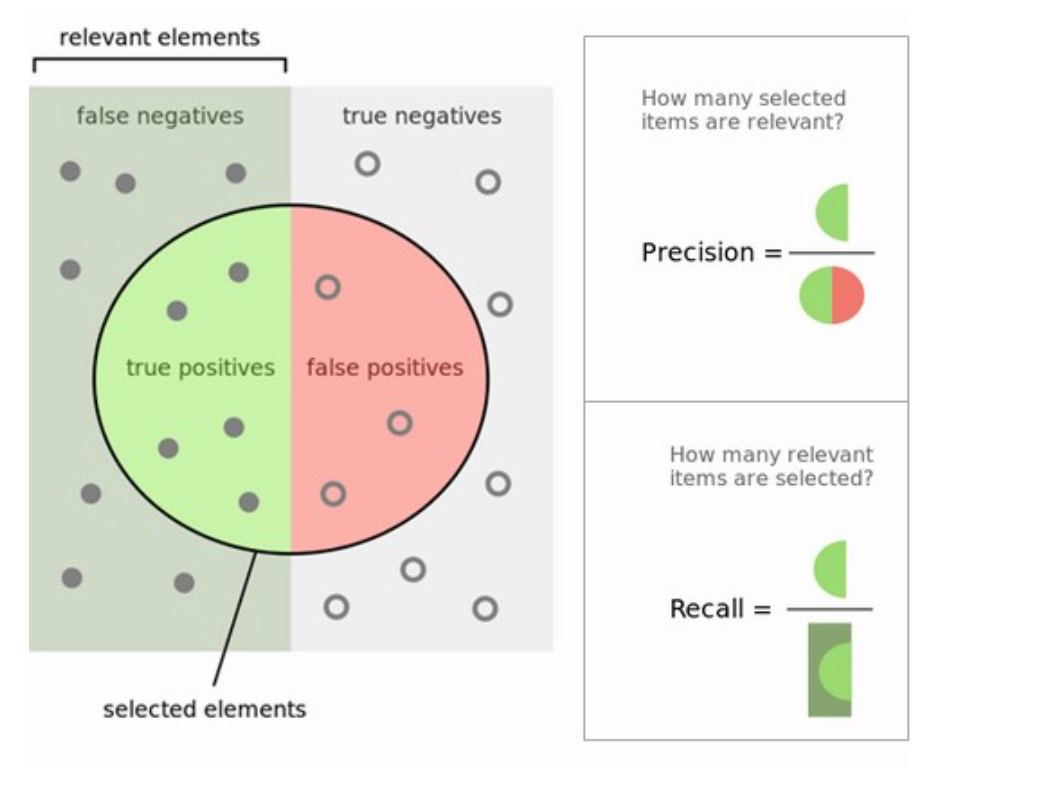

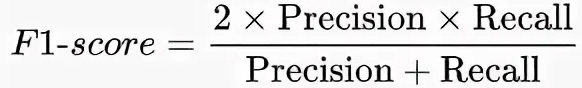

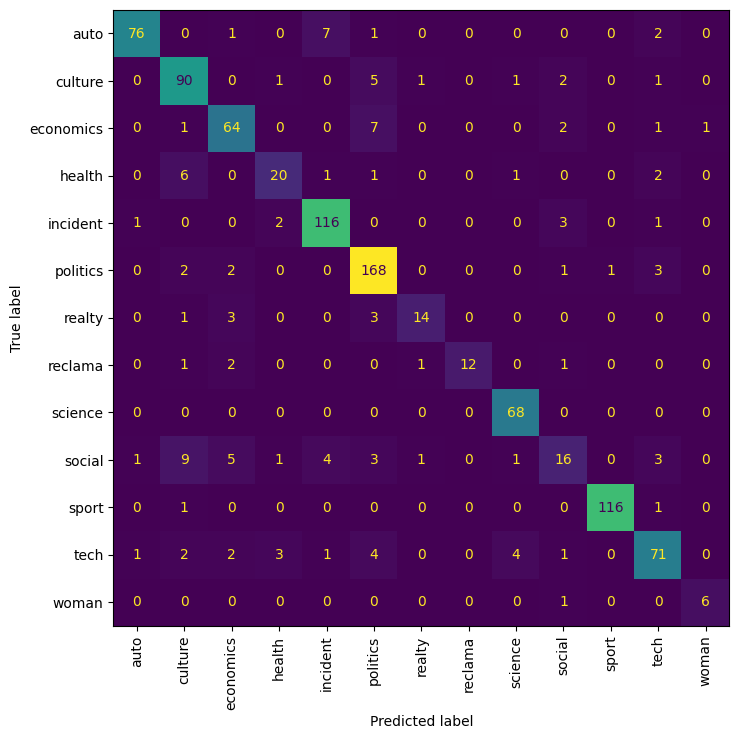

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,o), 
    display_labels=sorted(labels.keys()),
)
disp.plot(ax=ax, xticks_rotation='vertical', include_values=True, cmap='viridis',  colorbar=False,)
plt.show()

---

In [20]:
data['predict'] = pd.Series( clf.predict(data_tf) ).map( { labels[k]:k for k in labels } )

In [21]:
display( data )

,text,tag,predict
0,"В Саудовской Аравии сняли первый антитеррористический мультфильм -\nтрехминутную ленту ""Внимание!"". ""Внимание!"" отражает точку зрения мирового\nсообщества на войну, развязанную терроризмом, и поэт...",politics,culture
1,"Вчера вечером в Японии состоялась премьера голливудского фильма о гейшах,\nвызвавшая негодование в связи с тем, что эти девушки представлены\nпроститутками, а играющие их актрисы - китаянки. Мало ...",culture,culture
2,"Российский кинорежиссер и генеральный директор киноконцерна ""Мосфильм""\nКарен Шахназаров награжден ""Золотой пирамидой"" на XXIX Каирском кинофестивале\nза выдающийся вклад в мировое киноискусство. ...",culture,culture
3,30 ноября выдающейся российской балерине Майе Плисецкой будет вручена\nмедаль имени княгини Барборы Радвилайте. Церемония награждения состоится\nв Вильнюсе в Литовском национальном театре оперы и ...,culture,culture
4,"Гарольд Пинтер не приедет за Нобелевской премией из-за болезниАнглийский\nдраматург Гарольд Пинтер, получивший Нобелевскую премию по литературе в\n2005 году, отправит в Стокгольм видеозапись своей...",culture,culture
...,...,...,...
3191,Православие.Ру В сентябре 2010 года Святейший Патриарх Кирилл посетит Камчатку\nВопросы подготовки к поездке Предстоятеля Русской Православной Церкви на\nКамчатку обсуждались на встрече Святейшего...,social,social
3192,Интерфакс Религия (interfax-religion.ru) В Минрегионразвития призывают\nроссиян не бояться своего духовного наследия подобно Европе В министерстве\nрегионального развития РФ считают крайне важным ...,social,culture
3193,"Окно возможностей В Эвенкинском муниципальном районе приступили к\nисследованию традиционного уклада жизни. В Эвенкию прибыла экспедиция под\nруководством профессора, заведующего кафедрой менеджме...",science,science
3194,"ИТАР-ТАСС. Новости из властных структур. Совет Федерации предлагает определить\nособенности традиционной охоты коренных народов Севера, Сибири и Дальнего\nВостока Совет Федерации внес на рассмотр...",politics,politics


In [22]:
# Введение в анализ текстовой информации с помощью Python и методов машинного обучения
# https://habr.com/ru/post/205360/